In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

In [4]:
train_img = train_img / 255.0
test_img = test_img / 255.0

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

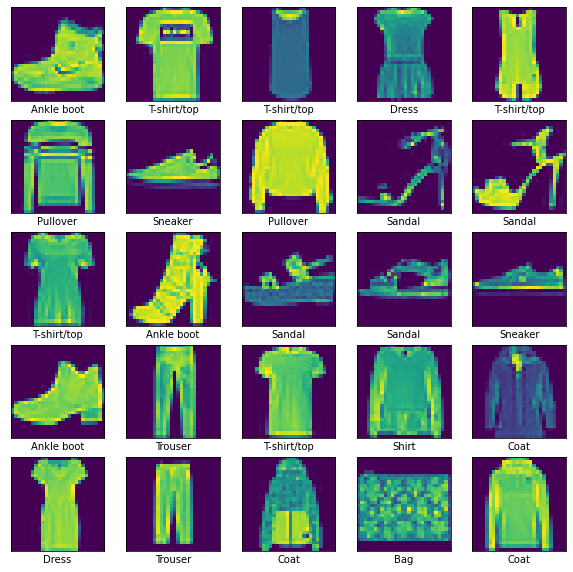

In [6]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_label[i]])
    plt.imshow(train_img[i])
plt.show()

In [7]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
model.fit(train_img, train_label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4916 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3681 - accuracy: 0.8674
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3323 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3098 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2932 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2786 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2670 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2551 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2456 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.236

In [9]:
test_loss, test_acc = model.evaluate(test_img, test_label)
print("test_loss = ", test_loss)
print("test_acc = ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8842
test_loss =  0.3309584856033325
test_acc =  0.8841999769210815


In [10]:
pred = model.predict(test_img)

In [14]:
def plot_pred(i, pred_arr, true_label, img):
    pred_arr, true_label, img = pred_arr[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    pred_label = np.argmax(pred_arr)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {} {}".format(class_names[pred_label], 100*np.max(pred_arr), class_names[true_label], color = color))

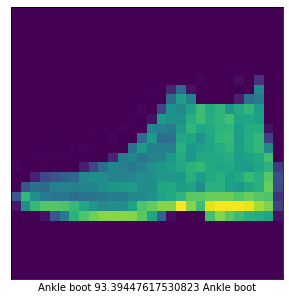

In [15]:
i = 0
plt.figure(figsize = (5, 5))
plot_pred(i, pred, test_label, test_img)

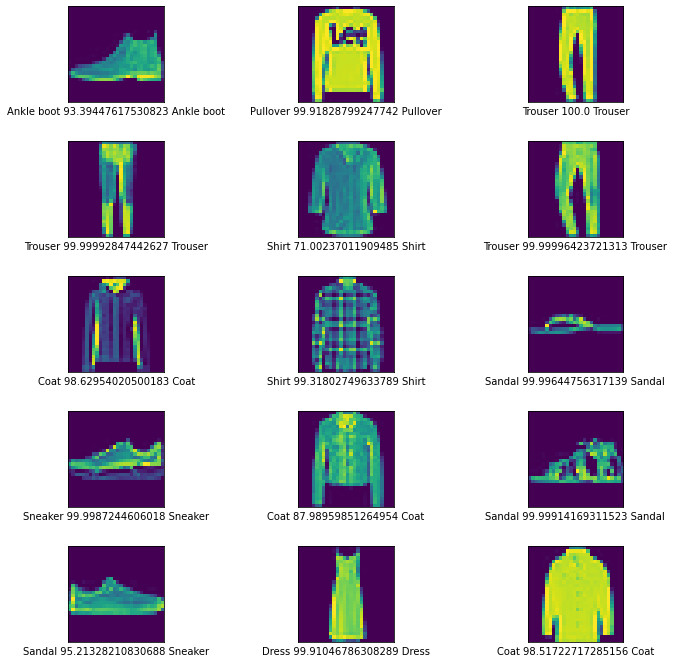

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(i, pred, test_label, test_img)
plt.show() 